Epoch 1/250


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.4145 - loss: 1.0983 - val_accuracy: 0.5000 - val_loss: 1.0718
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5177 - loss: 1.0955 - val_accuracy: 0.5000 - val_loss: 1.0595
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5435 - loss: 1.0971 - val_accuracy: 0.4167 - val_loss: 1.0502
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5374 - loss: 1.0902 - val_accuracy: 0.5000 - val_loss: 1.0427
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5734 - loss: 1.0908 - val_accuracy: 0.5000 - val_loss: 1.0385
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5440 - loss: 1.0875 - val_accuracy: 0.5000 - val_loss: 1.0345
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5132 - loss: 1.0933 - val_accuracy: 0.5000 - val_loss: 1.0317
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4712 - loss: 1.0913 - val_accuracy: 0.5000 - val_loss: 1.0291
Epoc

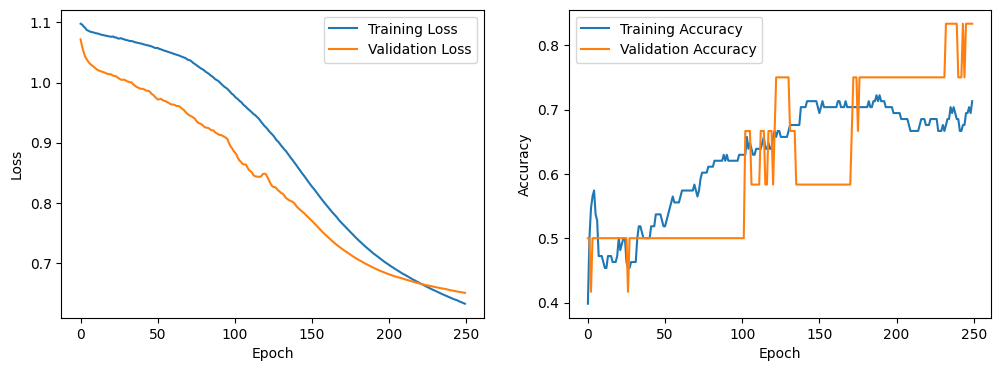

In [1]:
# Import the necessary libraries
# To split data into training and test sets
from sklearn.model_selection import train_test_split
# To encode labels in one-hot format
from tensorflow.keras.utils import to_categorical
# To create a sequential neural network model
from tensorflow.keras.models import Sequential
# To add dense (fully connected) layers
from tensorflow.keras.layers import Dense
# To visualize plots
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset from scikit-learn
iris = load_iris()
X = iris.data  # Features
Y = iris.target  # Labels

# Convert the labels to one-hot encoding
Y_one_hot = to_categorical(Y)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_one_hot, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential()
# First hidden layer: 6 neurons, ReLU activation
model.add(Dense(6, input_dim=4, activation='relu', name="hidden1_layer"))
# Second hidden layer: 5 neurons, ReLU activation
model.add(Dense(5, activation='relu', name="hidden2_layer"))
# Third hidden layer: 4 neurons, ReLU activation
model.add(Dense(4, activation='relu', name="hidden3_layer"))
# Output layer: 3 neurons (one per class), softmax activation
model.add(Dense(3, activation='softmax', name="output_layer"))

# Compile the model
# We specify the loss function (categorical_crossentropy for multiclass classification),
# the optimizer (adam), and the metric to monitor (accuracy).
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
# We reserve 10% of the training data for validation.
history = model.fit(X_train, Y_train, batch_size=32, epochs=250, verbose=1, validation_split=0.1)

# Evaluate the model on the test set with unseen data
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test set loss: {test_loss:.4f}")
print(f"Test set accuracy: {test_accuracy:.4f}")

# Visualize the training evolution
# We plot the loss and accuracy over the training process to detect issues like overfitting.
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'],
             label='Training Loss')
    plt.plot(history.history['val_loss'],
             label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'],
             label='Training Accuracy')
    plt.plot(history.history['val_accuracy'],
             label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_history(history)
